In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score, f1_score
import seaborn as sns


 accracy: 79.22%


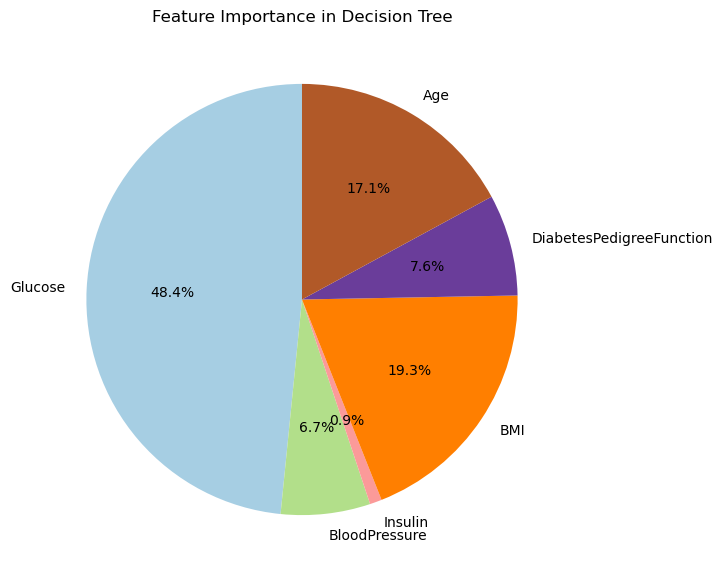

In [31]:
df = pd.read_csv("https://raw.githubusercontent.com/VIETQUOCHA/HA-QUOC-VIET-202239630-Introduce-To-AI/refs/heads/master/week2/diabetes.csv")
X = df.drop(columns=['Outcome'])  # features
y = df['Outcome']                 # label

# train = 80% , test = 20%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# DT model 생성
dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state = 42)

#train model
dt_model.fit(X_train, y_train)
# predict on X_test
y_pred = dt_model.predict(X_test)
#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"\n accracy: {accuracy * 100:.2f}%" )

#  Importance of features
importance_data = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.round(dt_model.feature_importances_ * 100, 2)
}) 


importance_data = importance_data[importance_data['Importance'] > 0]


labels = importance_data['Feature']
sizes = importance_data['Importance']


colors = plt.cm.Paired(np.linspace(0, 1, len(sizes)))


plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Feature Importance in Decision Tree")
plt.show()


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, roc_curve, auc
import seaborn as sns

Accuracy: 72.08%

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154


Confusion Matrix:
 [[77 22]
 [21 34]]


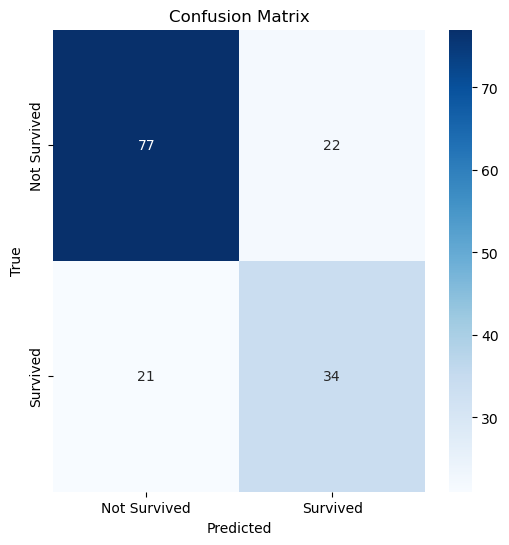

In [34]:
X = df.drop(columns=['Outcome'])  # features
y = df['Outcome']                 # label

# train = 80% , test = 20%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

#  Random Forest 모델 생성
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

#  모델 훈련
rf_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = rf_model.predict(X_test)

#  성능 평가 (Accuracy, Precision, Recall, F1-Score)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred) )

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# 11. Confusion Matrix 시각화
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 0.171045272808501
평균제곱근오차 0.171045272808501
평균제곱근오차 0.17104527280850093
